# Cleveland Heart Disease Dataset

#### 1. Aim

To determine the presence or absence of heart disease

following steps from: https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn

#### 2. Import Libraries

In [2]:
#Library import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import shap

#Module import

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
import shapley as shap
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

#Settings
#pd.set_option('max_columns', None)

#### 3. Background



The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).


*Description where coded*

**3 age**: age in years

**4 sex**: sex (1 = male; 0 = female)

**9 cp**: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

**10 trestbps**: resting blood pressure (in mm Hg on admission to the hospital)

**12 chol**: serum cholestoral in mg/dl

**16 fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**19 restecg**: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**32 thalach**: maximum heart rate achieved

**38 exang**: exercise induced angina (1 = yes; 0 = no)

**40 oldpeak**: ST depression induced by exercise relative to rest

**41 slope**: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

**44 ca**: number of major vessels (0-3) colored by flourosopy

**51 thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect

**58 num**: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)

### 4. Import Dataset

In [3]:
column_names = ['Age', 'Sex', 'Chest Pain', 'Resting BP', 'Cholestrol',
               'Fasting Sugar', 'Resting ECG', 'Max Heart Rate', 
               'Exercise induced angina', 'ST depression', 'Slope',
               'Number of Coloured Vessels', 'Defect Type', 
                'Diagnosis of Heart Disease']

In [4]:
df = pd.read_csv('processed.cleveland.data', names=column_names)

In [5]:
df.columns

Index(['Age', 'Sex', 'Chest Pain', 'Resting BP', 'Cholestrol', 'Fasting Sugar',
       'Resting ECG', 'Max Heart Rate', 'Exercise induced angina',
       'ST depression', 'Slope', 'Number of Coloured Vessels', 'Defect Type',
       'Diagnosis of Heart Disease'],
      dtype='object')

### 5. Exploratory Data Analysis

The data analysis will be divided into these 3 steps: 

1. Understanding your variables
2. Cleaning your dataset (will include making a label here so data can be analysed by label)
3. Analyzing relationships between variables

*1. Understanding the variables*

In [6]:
df.head()

Age  Sex  Chest Pain  Resting BP  Cholestrol  Fasting Sugar  Resting ECG  \
0  63.0  1.0         1.0       145.0       233.0            1.0          2.0   
1  67.0  1.0         4.0       160.0       286.0            0.0          2.0   
2  67.0  1.0         4.0       120.0       229.0            0.0          2.0   
3  37.0  1.0         3.0       130.0       250.0            0.0          0.0   
4  41.0  0.0         2.0       130.0       204.0            0.0          2.0   

   Max Heart Rate  Exercise induced angina  ST depression  Slope  \
0           150.0                      0.0            2.3    3.0   
1           108.0                      1.0            1.5    2.0   
2           129.0                      1.0            2.6    2.0   
3           187.0                      0.0            3.5    3.0   
4           172.0                      0.0            1.4    1.0   

  Number of Coloured Vessels Defect Type  Diagnosis of Heart Disease  
0                        0.0         6.0                           0  
1                        3.0         3.0                           2  
2                        2.0         7.0                           1  
3                        0.0         3.0                           0  
4                        0.0         3.0                           0

In [7]:
df.shape

(303, 14)

In [8]:
df.nunique(axis=0)

Age                            41
Sex                             2
Chest Pain                      4
Resting BP                     50
Cholestrol                    152
Fasting Sugar                   2
Resting ECG                     3
Max Heart Rate                 91
Exercise induced angina         2
ST depression                  40
Slope                           3
Number of Coloured Vessels      5
Defect Type                     4
Diagnosis of Heart Disease      5
dtype: int64

In [9]:
df.describe().transpose().round(2)

count    mean    std    min    25%    50%    75%  \
Age                         303.0   54.44   9.04   29.0   48.0   56.0   61.0   
Sex                         303.0    0.68   0.47    0.0    0.0    1.0    1.0   
Chest Pain                  303.0    3.16   0.96    1.0    3.0    3.0    4.0   
Resting BP                  303.0  131.69  17.60   94.0  120.0  130.0  140.0   
Cholestrol                  303.0  246.69  51.78  126.0  211.0  241.0  275.0   
Fasting Sugar               303.0    0.15   0.36    0.0    0.0    0.0    0.0   
Resting ECG                 303.0    0.99   0.99    0.0    0.0    1.0    2.0   
Max Heart Rate              303.0  149.61  22.88   71.0  133.5  153.0  166.0   
Exercise induced angina     303.0    0.33   0.47    0.0    0.0    0.0    1.0   
ST depression               303.0    1.04   1.16    0.0    0.0    0.8    1.6   
Slope                       303.0    1.60   0.62    1.0    1.0    2.0    2.0   
Diagnosis of Heart Disease  303.0    0.94   1.23    0.0    0.0    0.0    2.0   

                              max  
Age                          77.0  
Sex                           1.0  
Chest Pain                    4.0  
Resting BP                  200.0  
Cholestrol                  564.0  
Fasting Sugar                 1.0  
Resting ECG                   2.0  
Max Heart Rate              202.0  
Exercise induced angina       1.0  
ST depression                 6.2  
Slope                         3.0  
Diagnosis of Heart Disease    4.0

*2. Cleaning your variables*

In [10]:
df.isna().sum()

Age                           0
Sex                           0
Chest Pain                    0
Resting BP                    0
Cholestrol                    0
Fasting Sugar                 0
Resting ECG                   0
Max Heart Rate                0
Exercise induced angina       0
ST depression                 0
Slope                         0
Number of Coloured Vessels    0
Defect Type                   0
Diagnosis of Heart Disease    0
dtype: int64

Generate label for presence or absence of heart disease from the Diagnosis of Heart Disease column<br>
All values of >=1 indicate presence of heart disease and 0 is absence of heart disease<br>
1 will be presence of heart disease and 0 will be absence of heart disease<br>

In [11]:
df.loc[df['Diagnosis of Heart Disease']>0, 'Label'] = 1
df.loc[df['Diagnosis of Heart Disease']==0, 'Label'] = 0

In [12]:
df.Label = df.Label.astype(int)

It can be seen that 164 patients do not have heart disease and 139 patients do have heart disease

In [13]:
df.Label.value_counts()

0    164
1    139
Name: Label, dtype: int64

In [14]:
df.dtypes

Age                           float64
Sex                           float64
Chest Pain                    float64
Resting BP                    float64
Cholestrol                    float64
Fasting Sugar                 float64
Resting ECG                   float64
Max Heart Rate                float64
Exercise induced angina       float64
ST depression                 float64
Slope                         float64
Number of Coloured Vessels     object
Defect Type                    object
Diagnosis of Heart Disease      int64
Label                           int32
dtype: object

In [15]:
#df=df.drop(df['Number of Coloured Vessels'].str.strip() == '?')
df=df[df['Number of Coloured Vessels'].str.strip() != '?']
df=df[df['Defect Type'].str.strip() != '?']

In [16]:
df = df.apply(pd.to_numeric)

In [17]:
df.Label.value_counts()

0    160
1    137
Name: Label, dtype: int64

#### * Outlier Analysis

Age: Those with heart disease generally older with a smaller interquartile range than those without heart disease 

Sex: Those with heart disease were generally male, those without heart disease seem evenly split 

Chest pain: Those with heart disease generally were asymptomatic for chest pain

Resting blood pressure: 

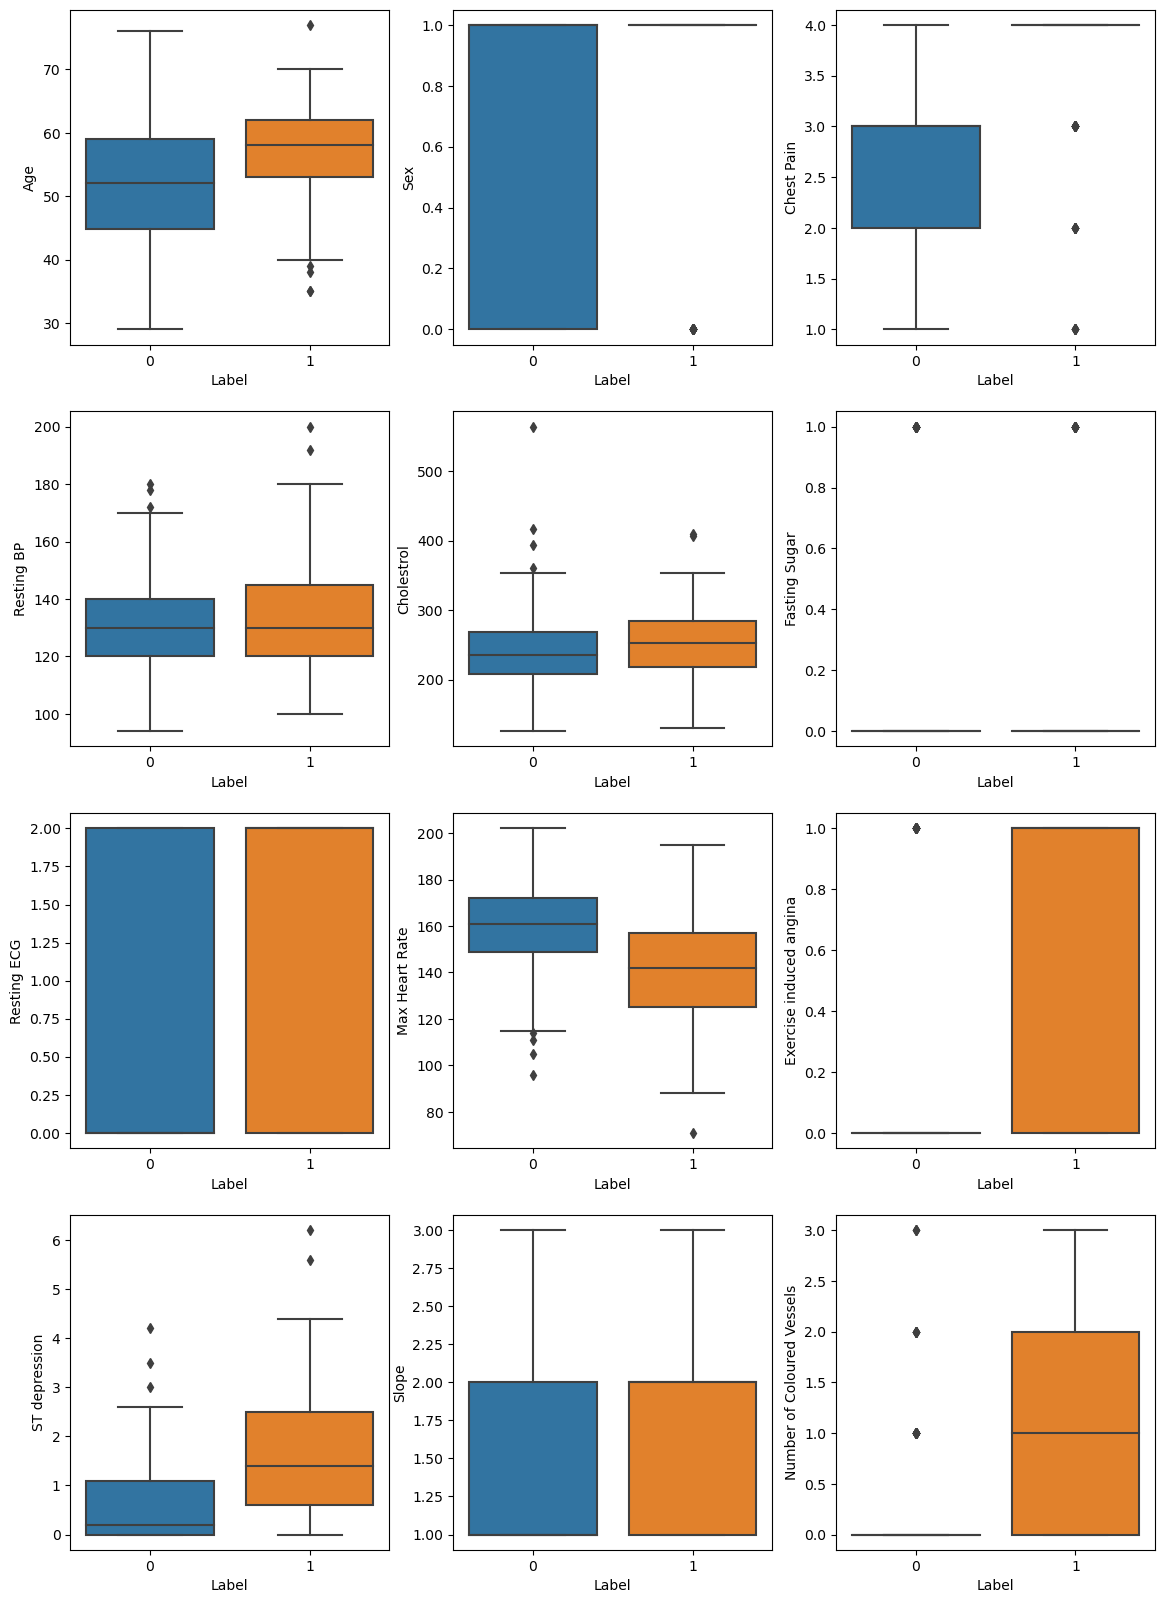

In [18]:
# Outlier Analysis

# Creating subplot axes
fig1, axes = plt.subplots(4,3,figsize=(14,20))
cols = ['Age', 'Sex', 'Chest Pain', 'Resting BP', 'Cholestrol', 'Fasting Sugar',
       'Resting ECG', 'Max Heart Rate', 'Exercise induced angina',
       'ST depression', 'Slope', 'Number of Coloured Vessels', 'Defect Type']
# Iterating through axes and names
for name, ax in zip(cols, axes.flatten()):
    sns.boxplot(y=name, x= 'Label', data=df, orient='v', ax=ax)

#### * 3. Analyzing relationships between variables 

None of the features seems to be highly correlated

##### Correlation Plot

<AxesSubplot:>

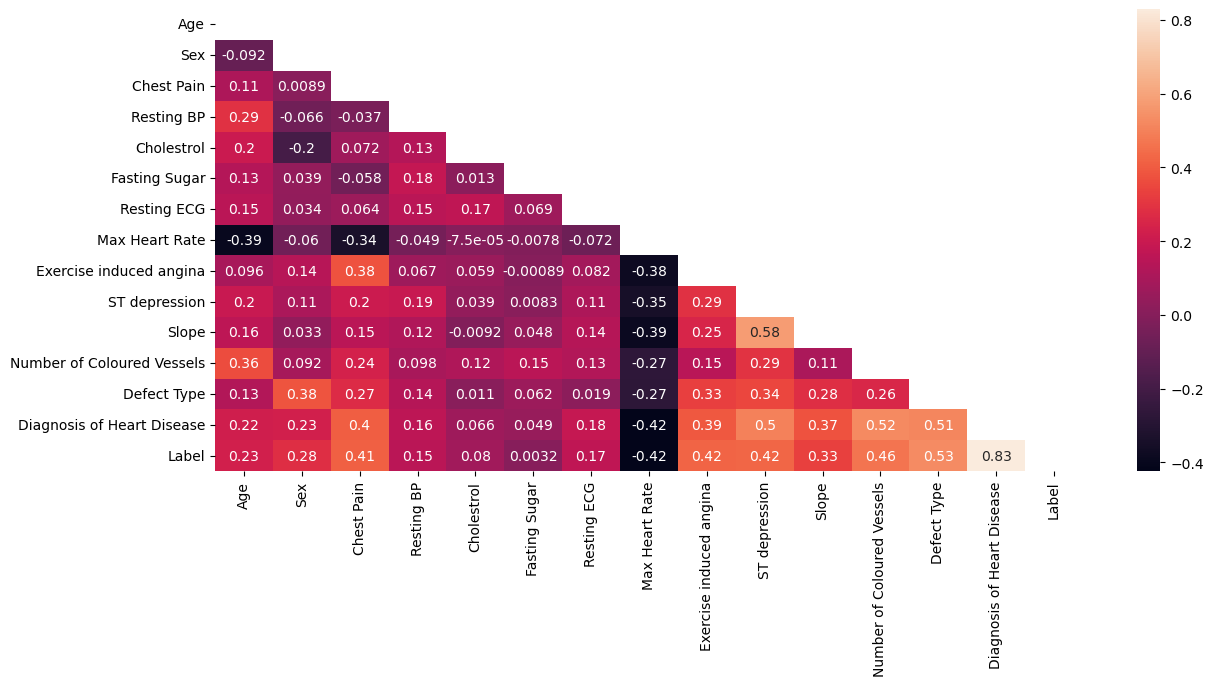

In [19]:
fig, ax = plt.subplots(figsize=(14, 6)) 
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df.corr(), mask= mask, ax= ax, annot= True)

##### Univariate Analysis

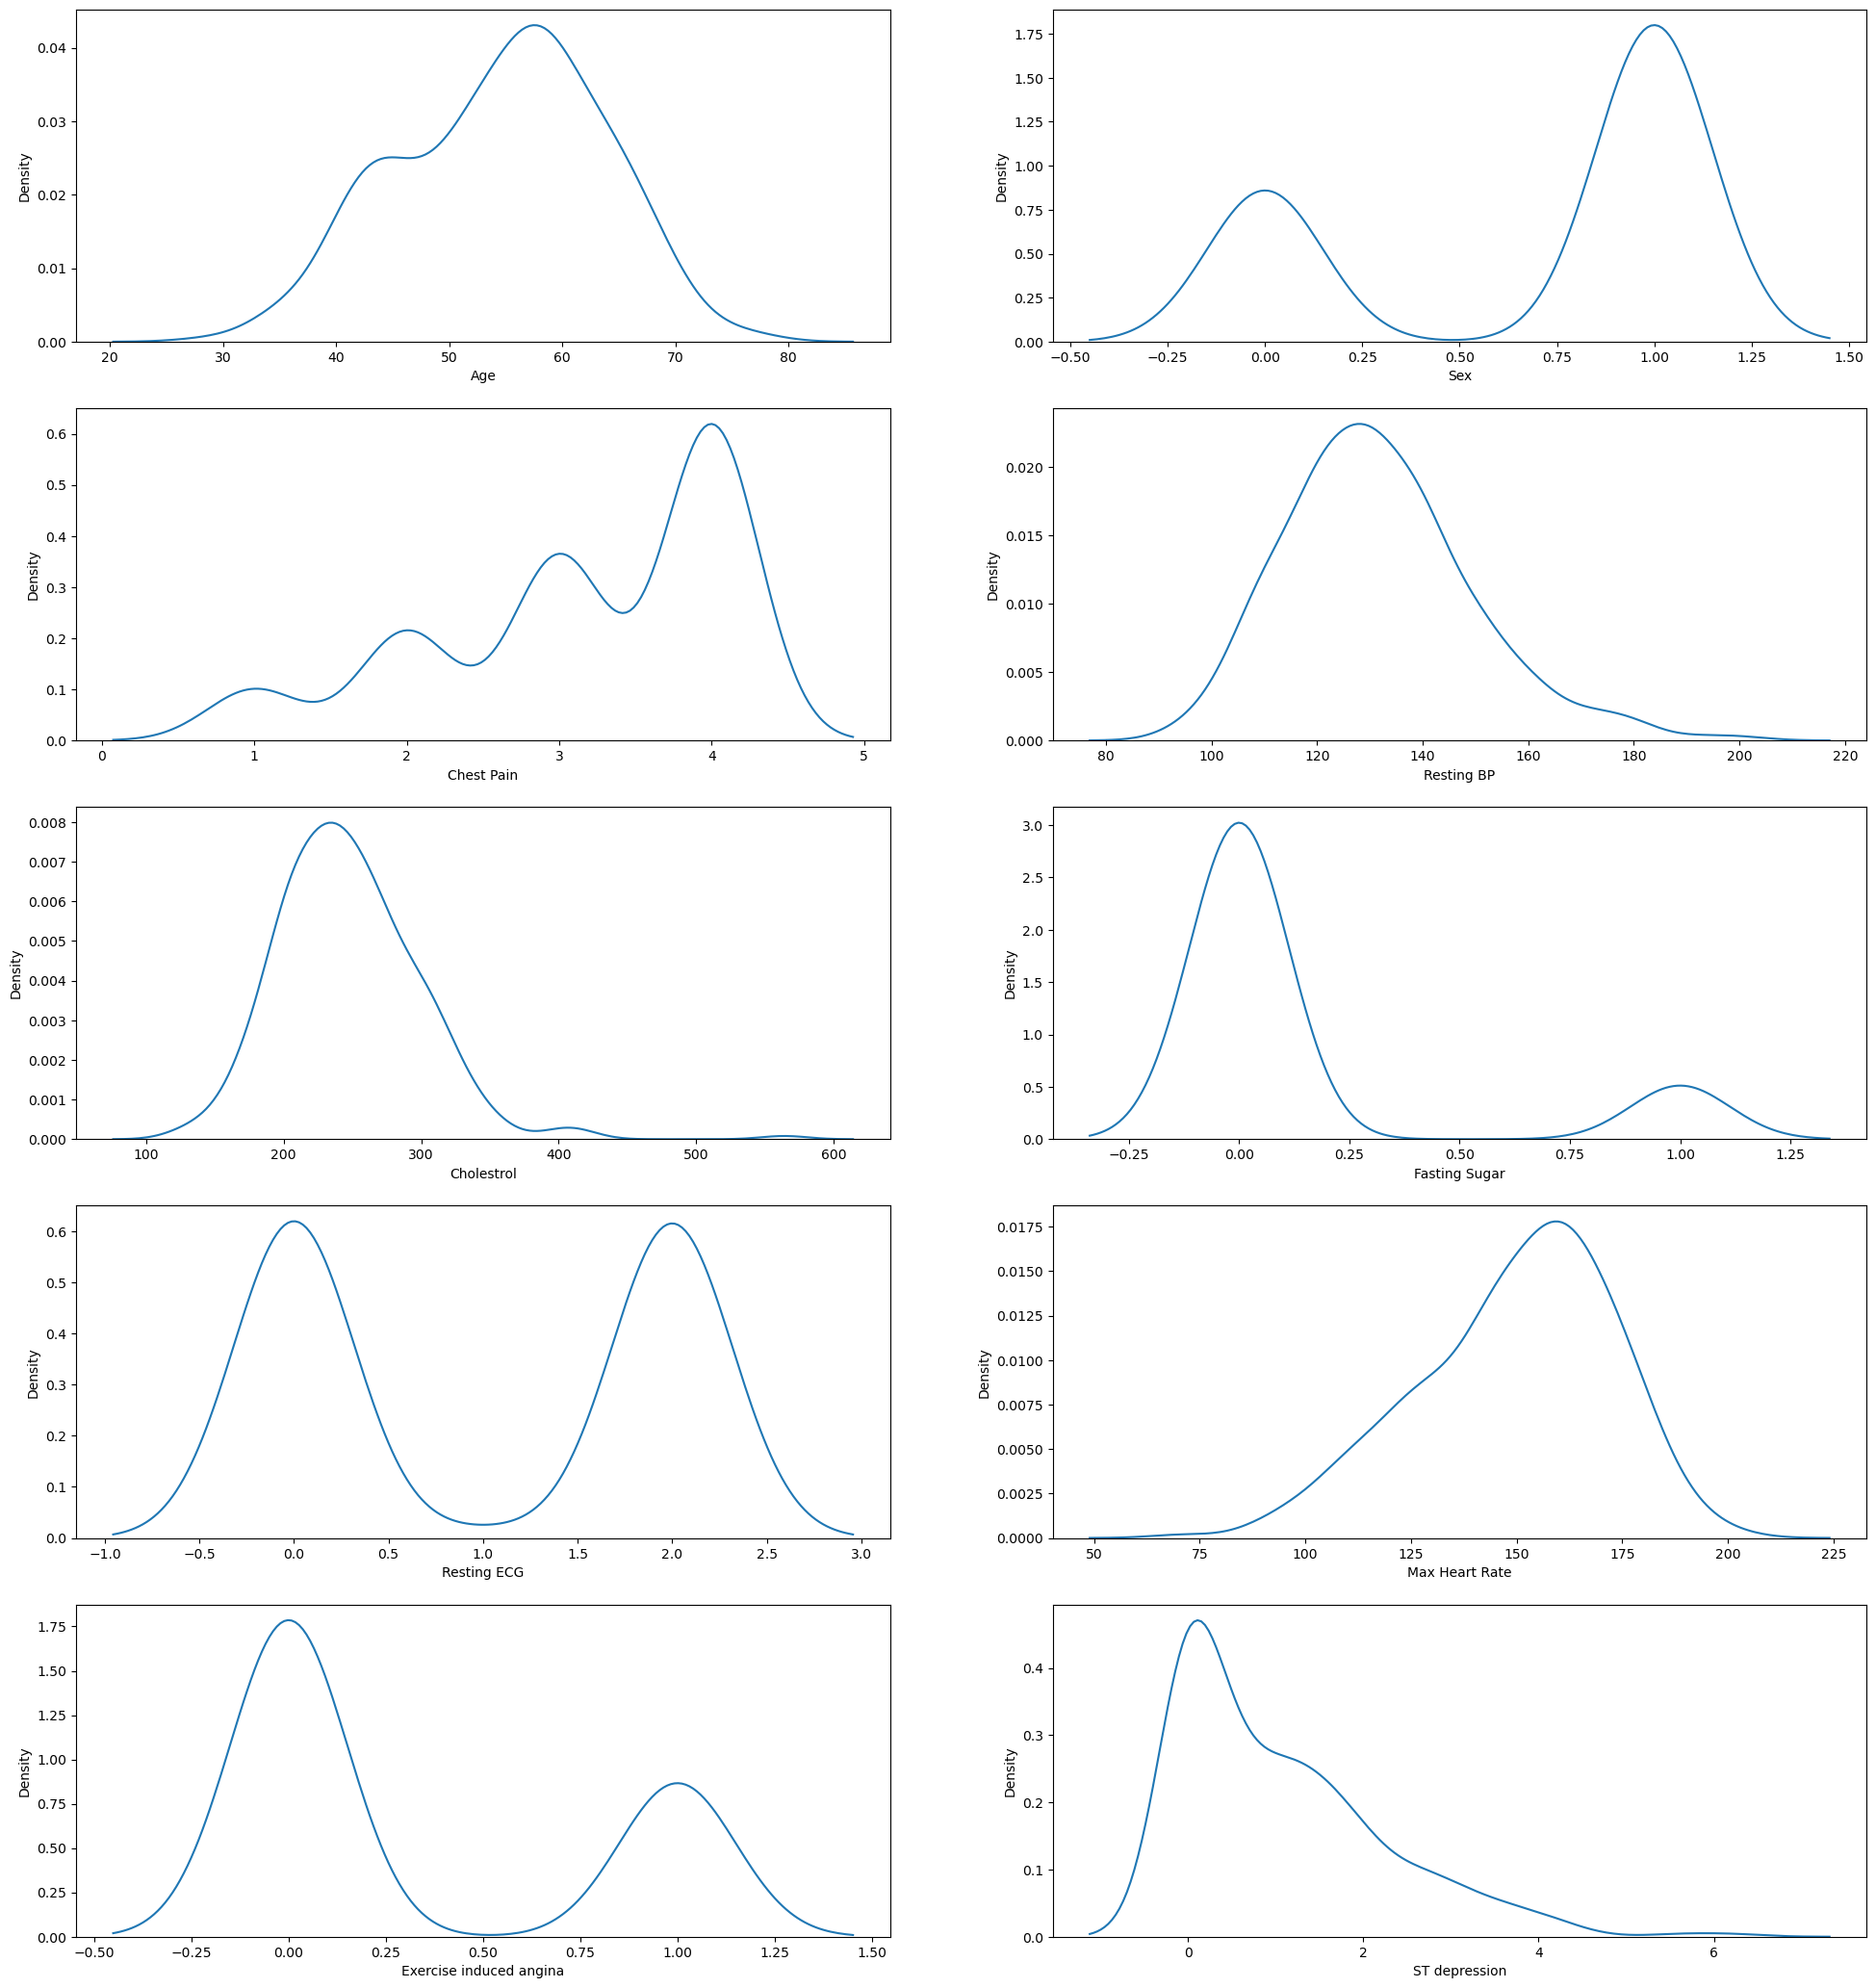

In [20]:
# Creating subplot axes
fig1, axes = plt.subplots(5,2,figsize=(24,26))
cols = ['Age', 'Sex', 'Chest Pain', 'Resting BP', 'Cholestrol',
               'Fasting Sugar', 'Resting ECG', 'Max Heart Rate', 
               'Exercise induced angina', 'ST depression', 'Slope',
               'Number of Coloured Vessels', 'Defect Type', 
                'Diagnosis of Heart Disease']
# Iterating through axes and names
for name, ax in zip(cols, axes.flatten()):
    sns.kdeplot(x= name, data=df, ax=ax)
    
    #sns.boxplot(x= name, data=df2, orient='v', ax=ax)

##### Bivariate Analysis

In [21]:
fig = px.scatter(df, x='Max Heart Rate', y='ST depression', color='Label')
fig.show()

In [22]:
fig = px.scatter(df, x='Age', y='Resting BP', color='Label')
fig.show()

In [23]:
fig = px.scatter(df, x='Cholestrol', y='Max Heart Rate', color='Label')
fig.show()

In [24]:
fig = px.scatter(df, x='ST depression', y='Max Heart Rate', color='Label')
fig.show()

In [25]:
df.columns

Index(['Age', 'Sex', 'Chest Pain', 'Resting BP', 'Cholestrol', 'Fasting Sugar',
       'Resting ECG', 'Max Heart Rate', 'Exercise induced angina',
       'ST depression', 'Slope', 'Number of Coloured Vessels', 'Defect Type',
       'Diagnosis of Heart Disease', 'Label'],
      dtype='object')

##### Histogram

Those with heart disease experience more chest pain than those without. 
Asymptomatic however still appears to be the most common.

In [26]:
fig = px.histogram(df, x="Chest Pain", color='Label')
fig.show()

In [27]:
fig = px.histogram(df, x='Cholestrol', color='Label')
fig.show()

Fasting sugar appears to be higher in those with heart disease than those without

In [28]:
fig = px.histogram(df, x='Fasting Sugar', color='Label')
fig.show()

In [29]:
df.head()

Age  Sex  Chest Pain  Resting BP  Cholestrol  Fasting Sugar  Resting ECG  \
0  63.0  1.0         1.0       145.0       233.0            1.0          2.0   
1  67.0  1.0         4.0       160.0       286.0            0.0          2.0   
2  67.0  1.0         4.0       120.0       229.0            0.0          2.0   
3  37.0  1.0         3.0       130.0       250.0            0.0          0.0   
4  41.0  0.0         2.0       130.0       204.0            0.0          2.0   

   Max Heart Rate  Exercise induced angina  ST depression  Slope  \
0           150.0                      0.0            2.3    3.0   
1           108.0                      1.0            1.5    2.0   
2           129.0                      1.0            2.6    2.0   
3           187.0                      0.0            3.5    3.0   
4           172.0                      0.0            1.4    1.0   

   Number of Coloured Vessels  Defect Type  Diagnosis of Heart Disease  Label  
0                         0.0          6.0                           0      0  
1                         3.0          3.0                           2      1  
2                         2.0          7.0                           1      1  
3                         0.0          3.0                           0      0  
4                         0.0          3.0                           0      0

In [30]:
df.columns

Index(['Age', 'Sex', 'Chest Pain', 'Resting BP', 'Cholestrol', 'Fasting Sugar',
       'Resting ECG', 'Max Heart Rate', 'Exercise induced angina',
       'ST depression', 'Slope', 'Number of Coloured Vessels', 'Defect Type',
       'Diagnosis of Heart Disease', 'Label'],
      dtype='object')

In [31]:
df_model = df[['Age', 'Sex', 'Chest Pain', 'Resting BP', 'Cholestrol', 'Fasting Sugar',
       'Resting ECG', 'Max Heart Rate', 'Exercise induced angina',
       'ST depression', 'Slope', 'Number of Coloured Vessels', 'Defect Type',
       'Diagnosis of Heart Disease', 'Label']]

#### *Model Preparation*

In [32]:
# One hot encode categorical variables: 

df_dc = pd.get_dummies(df_model, columns=['Chest Pain', 'Resting ECG', 'Slope', 'Defect Type'])

In [33]:
df_dc

Age  Sex  Resting BP  Cholestrol  Fasting Sugar  Max Heart Rate  \
0    63.0  1.0       145.0       233.0            1.0           150.0   
1    67.0  1.0       160.0       286.0            0.0           108.0   
2    67.0  1.0       120.0       229.0            0.0           129.0   
3    37.0  1.0       130.0       250.0            0.0           187.0   
4    41.0  0.0       130.0       204.0            0.0           172.0   
..    ...  ...         ...         ...            ...             ...   
297  57.0  0.0       140.0       241.0            0.0           123.0   
298  45.0  1.0       110.0       264.0            0.0           132.0   
299  68.0  1.0       144.0       193.0            1.0           141.0   
300  57.0  1.0       130.0       131.0            0.0           115.0   
301  57.0  0.0       130.0       236.0            0.0           174.0   

     Exercise induced angina  ST depression  Number of Coloured Vessels  \
0                        0.0            2.3                         0.0   
1                        1.0            1.5                         3.0   
2                        1.0            2.6                         2.0   
3                        0.0            3.5                         0.0   
4                        0.0            1.4                         0.0   
..                       ...            ...                         ...   
297                      1.0            0.2                         0.0   
298                      0.0            1.2                         0.0   
299                      0.0            3.4                         2.0   
300                      1.0            1.2                         1.0   
301                      0.0            0.0                         1.0   

     Diagnosis of Heart Disease  ...  Chest Pain_4.0  Resting ECG_0.0  \
0                             0  ...               0                0   
1                             2  ...               1                0   
2                             1  ...               1                0   
3                             0  ...               0                1   
4                             0  ...               0                0   
..                          ...  ...             ...              ...   
297                           1  ...               1                1   
298                           1  ...               0                1   
299                           2  ...               1                1   
300                           3  ...               1                1   
301                           1  ...               0                0   

     Resting ECG_1.0  Resting ECG_2.0  Slope_1.0  Slope_2.0  Slope_3.0  \
0                  0                1          0          0          1   
1                  0                1          0          1          0   
2                  0                1          0          1          0   
3                  0                0          0          0          1   
4                  0                1          1          0          0   
..               ...              ...        ...        ...        ...   
297                0                0          0          1          0   
298                0                0          0          1          0   
299                0                0          0          1          0   
300                0                0          0          1          0   
301                0                1          0          1          0   

     Defect Type_3.0  Defect Type_6.0  Defect Type_7.0  
0                  0                1                0  
1                  1                0                0  
2                  0                0                1  
3                  1                0                0  
4                  1                0                0  
..               ...              ...              ...  
297                0                0                1  
298   

In [34]:
df_dc.columns

Index(['Age', 'Sex', 'Resting BP', 'Cholestrol', 'Fasting Sugar',
       'Max Heart Rate', 'Exercise induced angina', 'ST depression',
       'Number of Coloured Vessels', 'Diagnosis of Heart Disease', 'Label',
       'Chest Pain_1.0', 'Chest Pain_2.0', 'Chest Pain_3.0', 'Chest Pain_4.0',
       'Resting ECG_0.0', 'Resting ECG_1.0', 'Resting ECG_2.0', 'Slope_1.0',
       'Slope_2.0', 'Slope_3.0', 'Defect Type_3.0', 'Defect Type_6.0',
       'Defect Type_7.0'],
      dtype='object')

In [35]:
X = df_dc[['Age', 'Sex', 'Resting BP', 'Cholestrol', 'Fasting Sugar',
       'Max Heart Rate', 'Exercise induced angina', 'ST depression',
       'Number of Coloured Vessels', 
       'Chest Pain_1.0', 'Chest Pain_2.0', 'Chest Pain_3.0', 'Chest Pain_4.0',
       'Resting ECG_0.0', 'Resting ECG_1.0', 'Resting ECG_2.0', 'Slope_1.0',
       'Slope_2.0', 'Slope_3.0', 'Defect Type_3.0', 'Defect Type_6.0',
       'Defect Type_7.0']]
y = df_dc['Label']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [37]:
X_train.shape

(237, 22)

In [38]:
type(X_train)

pandas.core.frame.DataFrame

In [39]:
min_max_scaler = preprocessing.MinMaxScaler() 
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [40]:
type(X_train_scaled)

numpy.ndarray

#### *Model Build*

In [41]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train_scaled,y_train)

predict_test = mlp.predict(X_test_scaled)

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



#### *Metrics*

In [42]:

print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        36
           1       0.86      0.75      0.80        24

    accuracy                           0.85        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.85      0.85      0.85        60



In [43]:
CF=confusion_matrix(y_test,predict_test)

Text(0.5, 23.52222222222222, 'Predicted label')

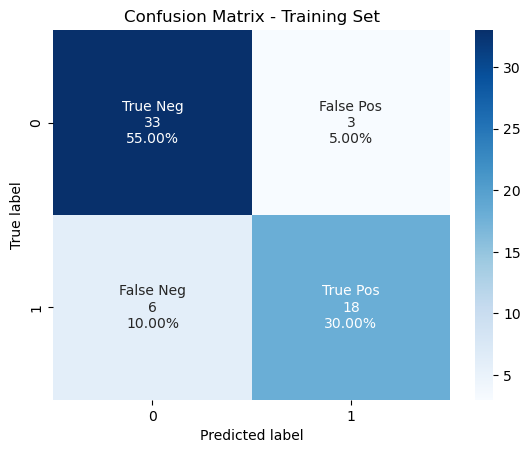

In [44]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in CF.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in CF.flatten()/np.sum(CF)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CF, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [45]:
CF=confusion_matrix(y_test,predict_test)

Text(0.5, 23.52222222222222, 'Predicted label')

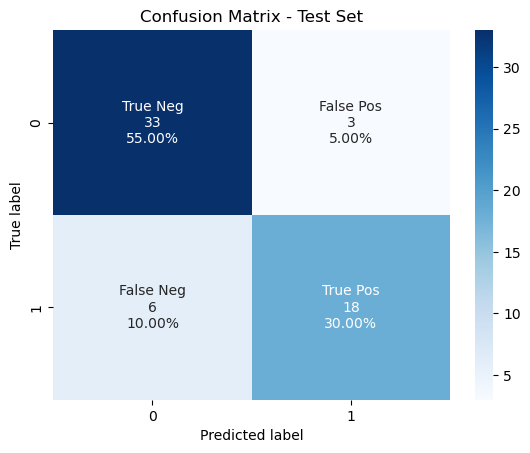

In [46]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in CF.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in CF.flatten()/np.sum(CF)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CF, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#### *Model Build with Hyperparameter Tuning

In [47]:
mlp_gs = MLPClassifier(max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp_gs, parameter_space,scoring='f1', n_jobs=-1, cv=5)
best_model=clf.fit(X_train_scaled, y_train) # X is train samples and y is the corresponding labels

In [48]:
clf.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (20,),
 'learning_rate': 'constant',
 'solver': 'sgd'}

In [49]:
predict_test = mlp.predict(X_test)

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



In [50]:
predict_probs = mlp.predict_proba(X_test)

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



In [51]:
predict_probs=predict_probs[:,1]

In [52]:
CF=confusion_matrix(y_test,predict_test)

Text(0.5, 23.52222222222222, 'Predicted label')

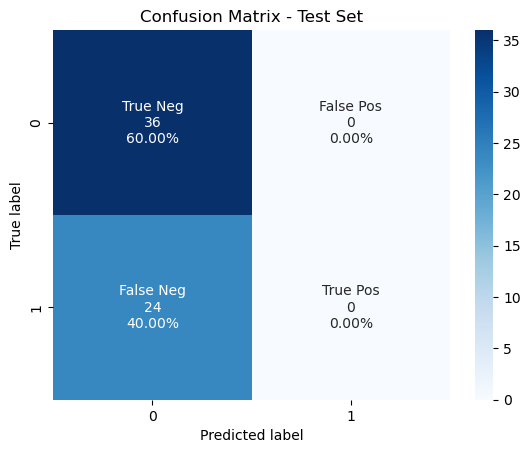

In [53]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in CF.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in CF.flatten()/np.sum(CF)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CF, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [54]:
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        36
           1       0.00      0.00      0.00        24

    accuracy                           0.60        60
   macro avg       0.30      0.50      0.37        60
weighted avg       0.36      0.60      0.45        60



C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



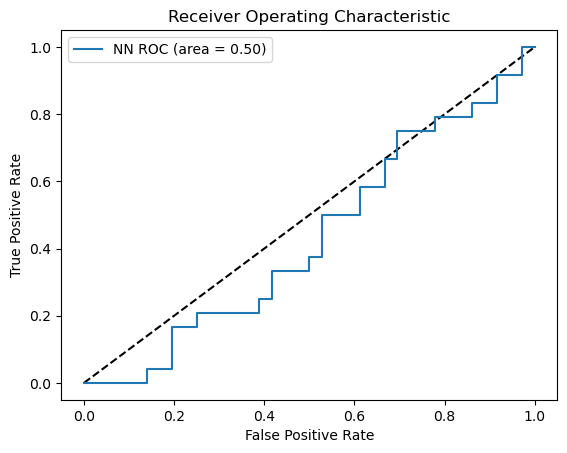

In [55]:
# Compute False postive rate, and True positive rate
fpr1 , tpr1, thresholds1 = roc_curve(y_test, predict_probs)

# Calculate Area under the curve to display on the plot
roc_auc = metrics.roc_auc_score(y_test, predict_test)

# Now, plot the computed values
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= '%s ROC (area = %0.2f)' % ("NN", roc_auc)) #"XGBoost Aki")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

#### SVM Model

We have seen that there are outliers in our dataset. <br>
So, we should increase the value of C as higher C means fewer outliers. <br>
So, I will run SVM with kernel=rbf and C=100.0.

In [56]:
# instantiate classifier with default hyperparameters
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8333


In [57]:
predict_test = svc.predict(X_test)

In [58]:
CF=confusion_matrix(y_test,predict_test)

Text(0.5, 23.52222222222222, 'Predicted label')

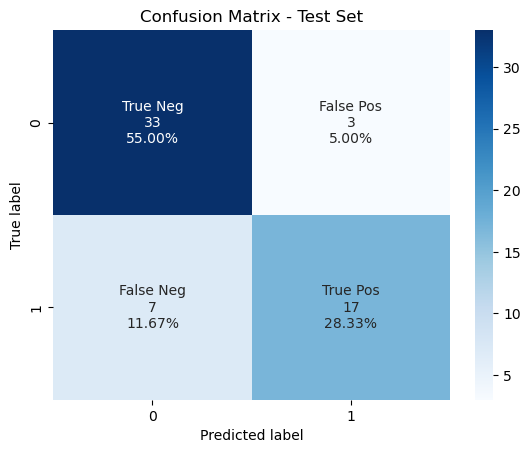

In [59]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in CF.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in CF.flatten()/np.sum(CF)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CF, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [60]:
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        36
           1       0.85      0.71      0.77        24

    accuracy                           0.83        60
   macro avg       0.84      0.81      0.82        60
weighted avg       0.83      0.83      0.83        60



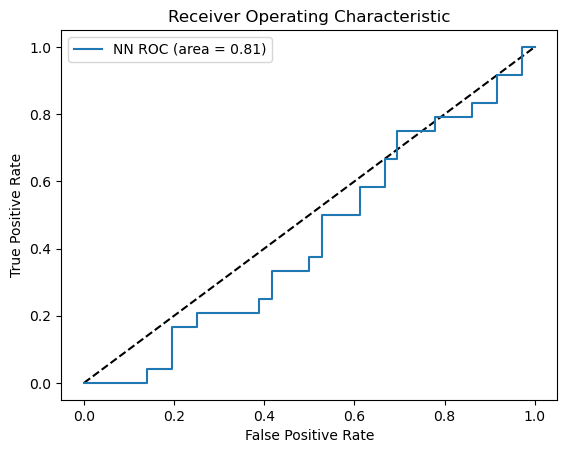

In [61]:
# Compute False postive rate, and True positive rate
fpr1 , tpr1, thresholds1 = roc_curve(y_test, predict_probs)

# Calculate Area under the curve to display on the plot
roc_auc = metrics.roc_auc_score(y_test, predict_test)

# Now, plot the computed values
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= '%s ROC (area = %0.2f)' % ("NN", roc_auc)) #"XGBoost Aki")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

#### Random Forest

In [62]:
scaler = MinMaxScaler()

In [63]:
# create pipeline with a scaler 
steps = [('scaler', scaler), ('RF', RandomForestClassifier(random_state=42))]
pipeline = Pipeline(steps)

In [64]:
rf_param_grid = {"RF__max_depth": [3, None],
              "RF__max_features": [1, 3, 10],
              "RF__min_samples_split": [1, 3, 10],
              "RF__min_samples_leaf": [1, 3, 10],
              "RF__bootstrap": [True, False],
              "RF__criterion": ["gini", "entropy"]}


In [65]:
# do search
search_RF = GridSearchCV(pipeline,rf_param_grid,n_jobs=-1,scoring='accuracy',cv=3,verbose=2)

In [66]:
search_RF.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


216 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MSI\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\MSI\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\MSI\anaconda3\lib\site-pac

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('RF',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'RF__bootstrap': [True, False],
                         'RF__criterion': ['gini', 'entropy'],
                         'RF__max_depth': [3, None],
                         'RF__max_features': [1, 3, 10],
                         'RF__min_samples_leaf': [1, 3, 10],
                         'RF__min_samples_split': [1, 3, 10]},
             scoring='accuracy', verbose=2)

In [67]:
search_RF.best_params_

{'RF__bootstrap': True,
 'RF__criterion': 'gini',
 'RF__max_depth': None,
 'RF__max_features': 1,
 'RF__min_samples_leaf': 10,
 'RF__min_samples_split': 3}

In [68]:
rfc_predict = search_RF.predict(X_test)

In [69]:
print(confusion_matrix(y_test, rfc_predict))

[[35  1]
 [ 6 18]]


In [70]:
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91        36
           1       0.95      0.75      0.84        24

    accuracy                           0.88        60
   macro avg       0.90      0.86      0.87        60
weighted avg       0.89      0.88      0.88        60



In [71]:
CF=confusion_matrix(y_test,rfc_predict)

Text(0.5, 23.52222222222222, 'Predicted label')

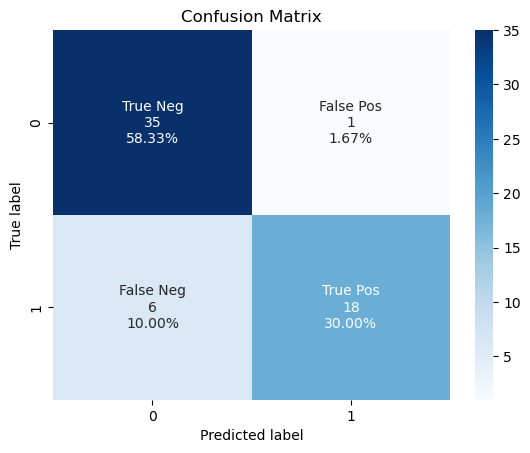

In [72]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in CF.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in CF.flatten()/np.sum(CF)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CF, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [73]:
rfc_predict_probs = search_RF.predict_proba(X_test)
y_hat=rfc_predict_probs[:,1]

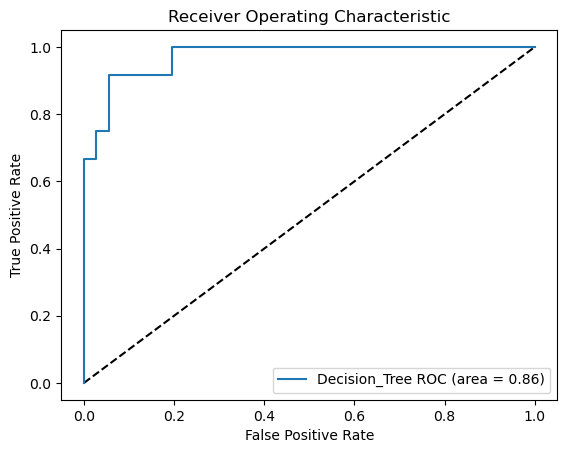

In [74]:
# Compute False postive rate, and True positive rate
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_hat)

# Calculate Area under the curve to display on the plot
roc_auc = metrics.roc_auc_score(y_test, rfc_predict)

# Now, plot the computed values
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= '%s ROC (area = %0.2f)' % ("Decision_Tree", roc_auc)) #"XGBoost Aki")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

#### Random Forest

In [75]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_scaled, y_train)
random_forest_preds = random_forest.predict(X_test_scaled)
print('The accuracy of the Random Forests model is :\t',metrics.accuracy_score(random_forest_preds,y_test))

The accuracy of the Random Forests model is :	 0.8666666666666667


In [76]:
print(classification_report(y_test,random_forest_preds))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



In [77]:
CF=confusion_matrix(y_test,random_forest_preds)

Text(0.5, 23.52222222222222, 'Predicted label')

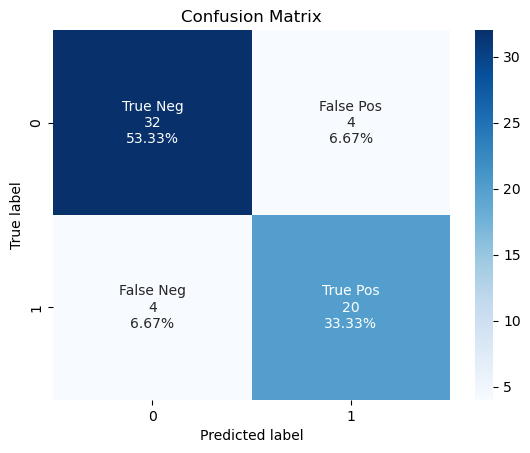

In [78]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in CF.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in CF.flatten()/np.sum(CF)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CF, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')